In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("../../datasets/fractions/data/Dyad_16Participant_6_Fixations.csv")
cscw_name_mapping = {
            "id": "subject_id",
            "Fixation Start [ms]": "time",
            "Position X": "x",
            "Position Y": "y",
            "Average Pupil Size [px] X": "pupil_diameter",
            "Fixation Duration [ms]": "duration",
            "Fixation End [ms]": "fixation_end",
        }
fractions_name_mapping = {
            "id": "subject_id",
            "start": "time",
            "x": "x",
            "y": "y",
            "Avg_Pupil_Size_X": "pupil_diameter",
            "duration": "duration",
            "end": "fixation_end",
        }
df = df.rename(columns=fractions_name_mapping)

In [46]:

def get_saccade_length(data):
    coordinates = data.loc[:, ["x", "y"]].to_numpy()
    shifted_coordinates = np.roll(coordinates, -1, axis=0).tolist()
    shifted_coordinates[-1] = coordinates[-1]
    return pd.Series([np.linalg.norm(a - b) for a, b in zip(coordinates, shifted_coordinates)])


def get_saccade_duration(data):
    endtimes = data.loc[:, "fixation_end"].to_numpy()
    starttimes = data.loc[:, "time"].to_numpy()
    shifted_starttimes = np.roll(starttimes, -1, axis=0).tolist()
    shifted_starttimes[-1] = starttimes[-1]
    return pd.Series(shifted_starttimes - endtimes)


def get_angle_of_saccades(data):
    coordinates = data.loc[:, ["x", "y"]].to_numpy()
    shifted_coordinates = np.roll(coordinates, -1, axis=0).tolist()
    shifted_coordinates[-1] = coordinates[-1]  # dette funker ikke må settes
    return [
        angle_between_coordinates(a, b)
        for a, b in zip(coordinates, shifted_coordinates)
    ]


def angle_between_coordinates(a, b):
    radians = math.atan2(b[1] - a[1], b[0] - a[0])
    return abs(radians)


def normalize_trials(df):
    # Since we combine the trials and only look at sections where they are reading code, it is a huge gap in time in the middle
    trial_1_endtime = df.loc[df["trial_number"] == 1, "fixationEnd"].iloc[-1]
    trial_2_starttime = df.loc[df["trial_number"] == 2, "fixationStart"].iloc[0]
    diff = trial_2_starttime - trial_1_endtime
    df.loc[df["trial_number"] == 2, "fixationStart"] -= diff
    df.loc[df["trial_number"] == 2, "fixationEnd"] -= diff
    return df

def normalize_time(df):

    df = fix_outliers_in_time(df)
    min_time = df["time"].min()
    df["time"] = df["time"] - min_time
    df["fixation_end"] = df["fixation_end"] - min_time
    return df


def fix_outliers_in_time(df):
    saccade_durations = get_saccade_length(df)
    median_duration = np.median(saccade_durations)
    threshold = np.percentile(saccade_durations, 70)
    bool_series = pd.Series(saccade_durations) > threshold
    bool_series.index = bool_series.index*2
    print(bool_series.index)
    print(df.index)
    indices = df[bool_series]
    



In [47]:

#df["time"] = df["time"]/1000
#df["fixation_end"] = df["fixation_end"]/1000
a = pd.Series(range(10))
a.quantile(0.2)

1.8

In [48]:
df = df[df["Event_Type"] == "Fixation L"]
df = normalize_time(df)
plt.plot(get_saccade_duration(df))
plt.show()
# cscw/data/Inchgower_1_1_VideoFixations_Details.csv

RangeIndex(start=0, stop=8676, step=2)
Int64Index([   0,    2,    4,    6,    8,   10,   12,   14,   16,   18,
            ...
            8667, 8669, 8671, 8673, 8675, 8677, 8679, 8681, 8683, 8685],
           dtype='int64', length=4338)
ipykernel_launcher:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

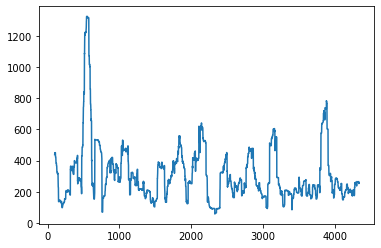

In [45]:
plt.plot(get_saccade_duration(df).rolling(100).mean())
plt.show()

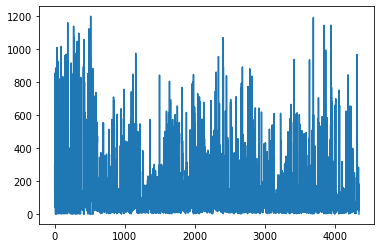

In [7]:
plt.plot(get_saccade_length(df))
plt.show()

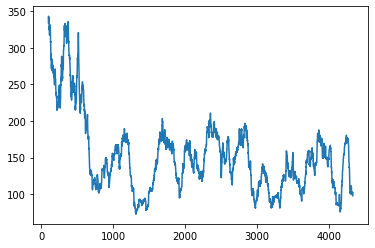

In [8]:
plt.plot(get_saccade_length(df).rolling(100).mean())
plt.show()

In [9]:
normalized_df = df/calibration_avg
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

NameError: name 'calibration_avg' is not defined

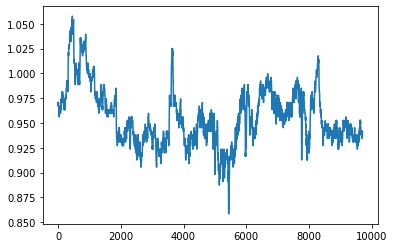

In [108]:
avg_first_30 = df.iloc[0:750, 0].mean()
normalized_df = df/avg_first_30
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

In [83]:
avg_first_30

4629    2.88
4630    2.88
4631    2.88
4632    2.88
4633    2.88
        ... 
5405    3.01
5406    3.00
5407    2.99
5408    2.98
5409    2.98
Name: L Mapped Diameter [mm], Length: 750, dtype: float64